### Tuning Observation

#### Load Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [9]:
# Load Dataset
path = './base/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,GP,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,0.540644,0.541378,0.541510,0.528311,0.541061,0.545402,0.541755,0.540557,0.542601,0.540948,0.511
1,2023-09-08 02:39:25,0.532119,0.535309,0.531985,0.501179,0.536035,0.542385,0.537362,0.534266,0.540143,0.535663,0.538
2,2023-09-08 02:39:30,0.525069,0.532046,0.522435,0.475169,0.535751,0.542976,0.537996,0.536223,0.540704,0.535930,0.534
3,2023-09-08 02:39:35,0.519240,0.529275,0.513022,0.455513,0.540611,0.541195,0.541960,0.538225,0.543890,0.537138,0.541
4,2023-09-08 02:39:40,0.514419,0.525706,0.503897,0.443747,0.543885,0.542825,0.545963,0.543374,0.546692,0.534217,0.543


#### Find Pearson Correlation

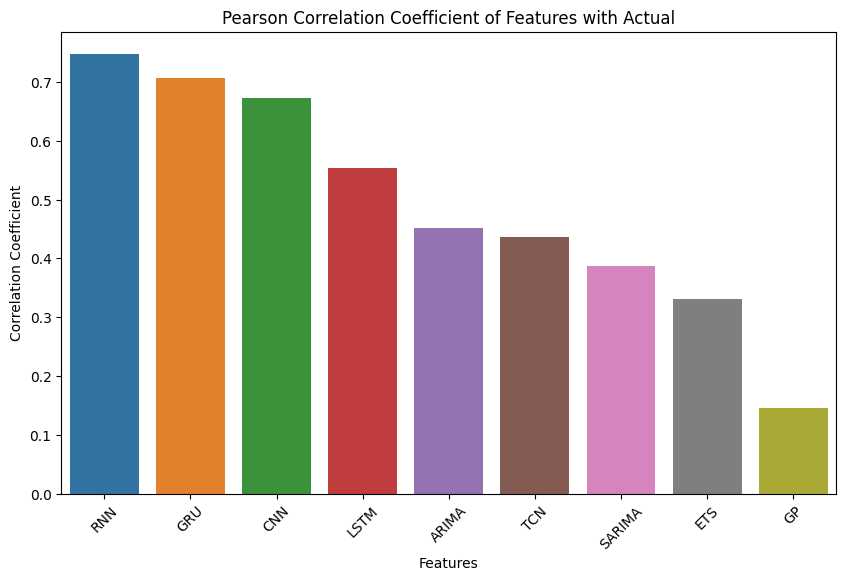

,Correlation with Actual
RNN,0.747628
GRU,0.706668
CNN,0.673055
LSTM,0.554604
ARIMA,0.451242
TCN,0.437311
SARIMA,0.387216
ETS,0.330367
GP,0.146619


In [3]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'GP', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Actual'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Actual'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted['Correlation with Actual'])
plt.title('Pearson Correlation Coefficient of Features with Actual')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [4]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[1000:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:1000]
test_data = cleaned_data.iloc[1000:]

#### Linear Regression

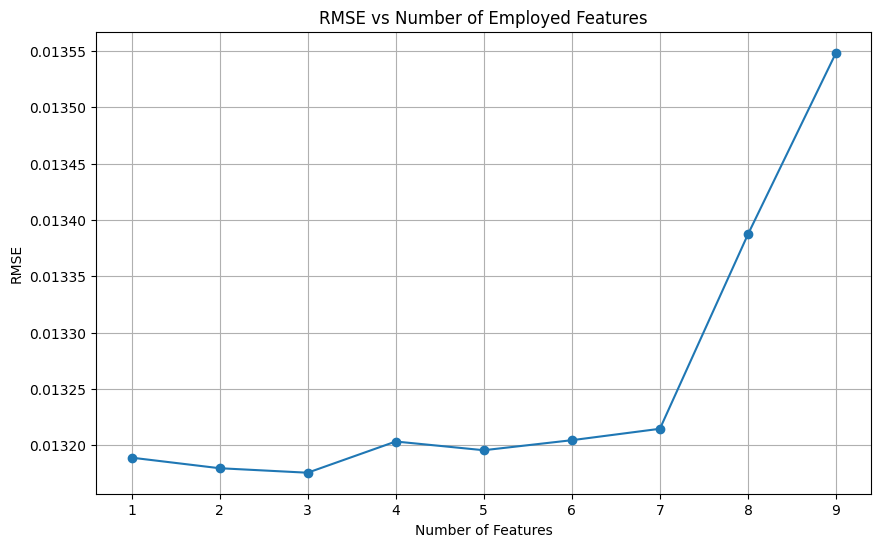

[0.013188956325276297,
 0.01317957117318838,
 0.013175571888508762,
 0.013203276078420798,
 0.013195539967929607,
 0.013204442576115576,
 0.013214575704213725,
 0.013387220941778842,
 0.013548372432839309]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

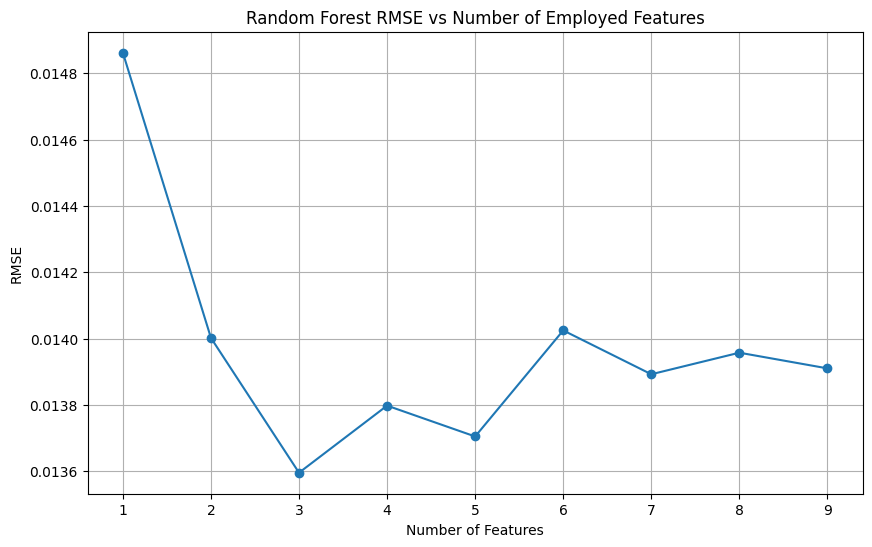

[0.014861718524110527,
 0.014002118254035724,
 0.013595756146680502,
 0.013797975706602749,
 0.013705000284567653,
 0.014024704945202922,
 0.013892554739859779,
 0.013957542047223081,
 0.013910293239180837]

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

2023-11-29 15:13:34.497274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 1ms/step


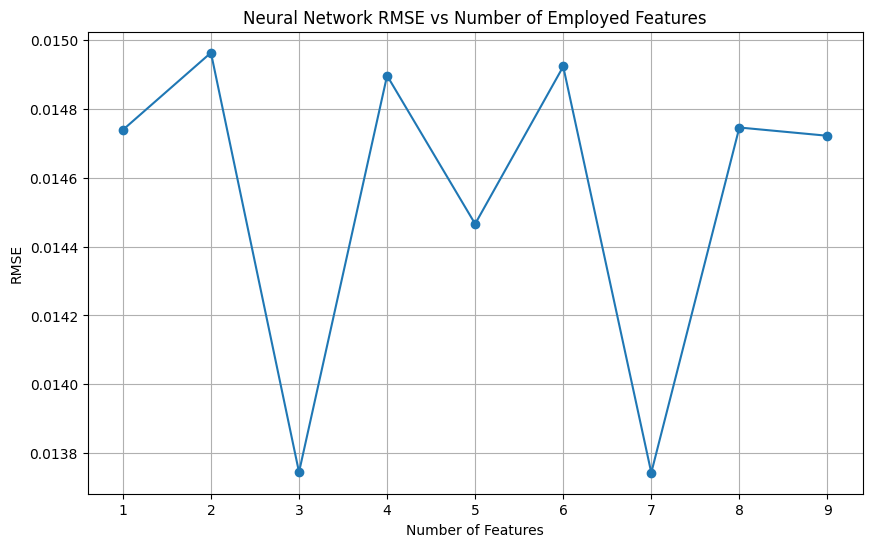

[0.014739004597589735,
 0.014963138083387298,
 0.013744666988399122,
 0.014896522427223401,
 0.014465757243856217,
 0.01492312601544885,
 0.013742966400267058,
 0.014745868504899848,
 0.014721879452275596]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values

#### Weighted Average

Using top 1 features
Using top 2 features
Using top 3 features
Using top 4 features
Using top 5 features
Using top 6 features
Using top 7 features
Using top 8 features
Using top 9 features


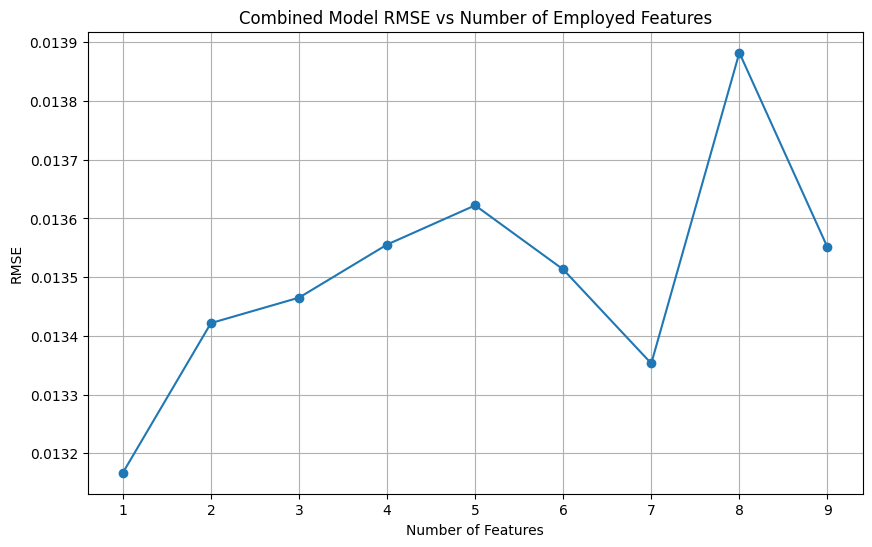

[0.013166731787476488,
 0.013421650958724664,
 0.013465025837627518,
 0.013555474058691602,
 0.013622269094106966,
 0.013513068083063686,
 0.013352909783683316,
 0.01388232719429532,
 0.013550934625233949]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# List to store RMSE values for combined model predictions
combined_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    print(f"Using top {i} features")
    selected_features = sorted_features[:i]
    
    # Preparing data
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Initialize models
    linear_model = LinearRegression()
    rf_model = RandomForestRegressor()
    nn_model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])
    nn_model.compile(optimizer="adam", loss="mse")

    # Train models
    linear_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Initial weights
    weights = {'linear': 1/3, 'random_forest': 1/3, 'neural_network': 1/3}
    cumulative_predictions = np.zeros(len(X_test))
    cumulative_linear_predictions = np.zeros(len(X_test))
    cumulative_rf_predictions = np.zeros(len(X_test))
    cumulative_nn_predictions = np.zeros(len(X_test))
    cumulative_actuals = np.zeros(len(X_test))

    # Nested loop for dynamic weight adjustment
    for t in range(len(X_test)):
        # Predicting one value at a time
        linear_pred = linear_model.predict([X_test[t]])[0]
        rf_pred = rf_model.predict([X_test[t]])[0]
        nn_pred = nn_model.predict([X_test[t:t+1]], verbose=0).flatten()[0]

        # Update cumulative predictions and actuals
        cumulative_predictions[t] = linear_pred * weights['linear'] + rf_pred * weights['random_forest'] + nn_pred * weights['neural_network']
        cumulative_linear_predictions[t] = linear_pred
        cumulative_rf_predictions[t] = rf_pred
        cumulative_nn_predictions[t] = nn_pred
        cumulative_actuals[t] = y_test[t]

        # Update RMSE and weights if not the first iteration
        if t > 0:
            # Update RMSE based on cumulative data
            historical_rmse = {
                'linear': mean_squared_error(cumulative_actuals[:t+1], cumulative_linear_predictions[:t+1], squared=False),
                'random_forest': mean_squared_error(cumulative_actuals[:t+1], cumulative_rf_predictions[:t+1], squared=False),
                'neural_network': mean_squared_error(cumulative_actuals[:t+1], cumulative_nn_predictions[:t+1], squared=False)
            }

            # Update weights
            exp_weights = {model: np.exp(-1 * rmse) for model, rmse in historical_rmse.items()}
            total_weight = sum(exp_weights.values())
            weights = {model: weight / total_weight for model, weight in exp_weights.items()}

    # Calculate RMSE for combined predictions
    combined_rmse = mean_squared_error(y_test, cumulative_predictions, squared=False)
    combined_rmse_values.append(combined_rmse)

# Plotting the graph of RMSE vs number of employed features for the combined model
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), combined_rmse_values, marker='o')
plt.title('Combined Model RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for the combined model
combined_rmse_values